In [1]:
import random
random.seed(42) # Define um fator aleatoriedade para todo o script. Fazendo com que essa aleatoriedade possa ser comparada.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from pycaret.regression import setup, compare_models
from catboost import CatBoostRegressor
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score

In [2]:
train = pd.read_csv('train.csv', header=(0))
train_id = train["Id"]
target = train[["Id","SalePrice"]].set_index("Id")
train = train.drop(columns="SalePrice")
train = train.set_index("Id")
train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml


In [3]:
test = pd.read_csv('test.csv', header=(0))
test_id = test["Id"]
test = test.set_index("Id")
test.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal


In [4]:
dataset_processing = pd.concat([train, test])
dataset_processing

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


## Limpeza de dados

In [5]:
# MSSubClass: Identifica o tipo de habitação objeto da venda.

# MSZoning: Identifica a classificação geral da zona da venda.

# LotFrontage: se refere à medida linear, em pés, da frente do lote que está conectada à rua. Em outras palavras, é a extensão da propriedade ao longo da rua.

# LotArea: É a área total do terreno, medida em unidades de área quadrada nos Estados Unidos.

# Street: Essa variável descreve o tipo de via que proporciona acesso à propriedade, como por exemplo, rua pavimentada, estrada de terra, beco sem saída, entre outros.

# Alley: se refere ao tipo de acesso à propriedade através de um beco ou viela. Essa variável descreve o tipo de acesso secundário ou via de serviço que conecta a propriedade a uma via principal ou à parte traseira de outras propriedades. Isso pode incluir diferentes condições, como acesso pavimentado, cascalho, terra batida, ou até mesmo a ausência de acesso por viela.

# LotShape: Descreve a forma geral da propriedade, principalmente o que define a regularidade da casa. Em graus de regularidade

# LandCointour descreve a planura da propriedade. As caracteristicas definem diferentes formas topográficas.

# Utilities: Descreve o tipo de utilidades disponíveis na propriedade, como eletricidade, gás, água e esgoto.

# LotConfig:  Descreve a configuração do lote. Aqui estão as categorias e suas descrições. Essas categorias indicam diferentes configurações de localização do lote em relação às vias públicas e aos lotes adjacentes.

# LandSlope: Declive do terreno da propriedade - Suave, Moderado, Acentuado

# Neighborhood: Localizações físicas dentro dos limites da cidade de Ames - Bloomington Heights, Bluestem, Briardale, etc...

# Condition1: Proximidade a várias condições - Adjacente a rua arterial, Adjacente a rua de alimentação, Normal, Dentro de 200' da ferrovia Norte-Sul, Adjacente a ferrovia Norte-Sul, Próximo a recurso positivo fora do local - parque, área verde, etc...

# Condition2: Proximidade a várias condições (caso mais de uma esteja presente) - Igual Condition1

# BldgType: Tipo de habitação - Unifamiliar (Casa independente), Conversão bifamiliar; originalmente construída como uma única habitação, Duplex, Unidade de ponta de condomínio, Unidade interna de condomínio

# HouseStyle: Estilo de habitação - Uma história, Uma e meia história: 2º nível acabado, Basicamente isso é referindo sobre a casa.

# OverallQual: Avalia o material geral e acabamento da casa - 10: Muito Excelente, 9: Excelente, etc...

# OverallCond: Avalia a condição geral da casa - 10: Muito Excelente, 9: Excelente, 8: Muito Bom, etc..

# YearBuilt: Data original de construção

# YearRemodAdd: Data de remodelação (a mesma da data de construção se não houve remodelação ou adições)

# RoofStyle: Tipo de telhado - Plano, Gable (Duas águas), Gambrel (Celeiro), Hip (Quatro águas), Mansard (Mansarda), Shed (Galpão)

# RoofMatl: Material do telhado - Argila ou Telha, Telha Padrão (Composta), Membrana, Metal, Rolo, Cascalho e Alcatrão, Telhas de Madeira, Aglomerados de Madeira

# Exterior1st: Revestimento exterior da casa - Telhas de Amianto, Telhas de Asfalto, Tijolo Comum, Tijolo Aparente, Bloco de Concreto, Placa de Cimento, Painel de Madeira, etc...

# Exterior2nd: Revestimento exterior da casa (caso haja mais de um material) - Telhas de Amianto, Telhas de Asfalto, Tijolo Comum, Tijolo Aparente, Bloco de Concreto, Placa de Cimento, Painel de Madeira, etc...

# MasVnrType: Tipo de revestimento de alvenaria - Tijolo Comum, Tijolo Aparente, Bloco de Concreto, Nenhum, Pedra

# ExterQual: Avalia a qualidade do material na parte exterior - Excelente, Bom, Médio/Típico, Regular, Ruim

# ExterCond: Avalia a condição atual do material na parte exterior - Excelente, Bom, Médio/Típico, Regular, Ruim

# Foundation: Tipo de fundação - Tijolo e Telha, Bloco de Concreto, Concreto Lançado, Laje, Pedra, Madeira

# BsmtQual: Avalia a altura do porão - Excelente (100+ polegadas), Bom (90-99 polegadas), etc...

# BsmtCond: Avalia a condição geral do porão - Excelente, Bom, Típico - leve umidade permitida, etc...

# BsmtExposure: Refere-se às paredes do nível térreo ou do jardim - Boa exposição, Exposição Média (níveis divididos ou hall de entrada geralmente pontuam médio ou acima), Exposição Mínima, Sem Exposição, Sem porão

# BsmtFinType1: Classificação da área acabada do porão - Ótimos Quartos de Vida, Quartos de Vida Médios, Quartos de Vida Abaixo da Média, Sala de Recreação Média, Qualidade Baixa, Inacabado, Sem porão

# BsmtFinSF1: Pés quadrados acabados do tipo 1

# BsmtFinType2: Classificação da área acabada do porão (se houver vários tipos) - Ótimos Quartos de Vida, Quartos de Vida Médios, Quartos de Vida Abaixo da Média, Sala de Recreação Média, Qualidade Baixa, Inacabado, Sem porão

# BsmtFinSF2: Pés quadrados acabados do tipo 2

# BsmtUnfSF: Pés quadrados não acabados da área do porão

# TotalBsmtSF: Pés quadrados totais da área do porão

# Heating: Tipo de aquecimento - Forno de chão, Forno a gás forçado com ar quente, Aquecimento a gás com água quente ou vapor, Forno de gravidade, Aquecimento a água quente ou vapor que não seja a gás, Forno de parede

# HeatingQC: Qualidade e condição do aquecimento - Excelente, Bom, Médio/Típico, Regular, Ruim

# CentralAir: Ar condicionado central - Não, Sim

# Electrical: Sistema elétrico - Padrão com disjuntores e fiação Romex, Caixa de fusíveis acima de 60 AMP e toda fiação Romex (Médio), Caixa de fusíveis de 60 AMP e principalmente fiação Romex (Regular), Caixa de fusíveis de 60 AMP e principalmente fiação de knob & tube (Ruim), Misto

# 1stFlrSF: Pés quadrados do primeiro andar

# 2ndFlrSF: Pés quadrados do segundo andar

# LowQualFinSF: Pés quadrados acabados de baixa qualidade (todos os pisos)

# GrLivArea: Área de estar acima do solo (terreno) em pés quadrados

# BsmtFullBath: Banheiros completos no porão

# BsmtHalfBath: Banheiros de meio no porão

# FullBath: Banheiros completos acima do solo

# HalfBath: Meio banhos acima do solo

# Bedroom: Quartos acima do solo (não inclui quartos do porão)

# Kitchen: Cozinhas acima do solo

# KitchenQual: Qualidade da cozinha - Excelente, Bom, Médio/Típico, Regular, Ruim

# TotRmsAbvGrd: Total de quartos acima do solo (não inclui banheiros)

# Functional: Funcionalidade da casa (Assume típica a menos que deduções sejam justificadas) - Funcionalidade Típica, Deduções Menores 1, Deduções Menores 2, Deduções Moderadas, Deduções Principais 1, Deduções Principais 2, Danos Severos, Apenas Salvamento

# Fireplaces: Número de lareiras

# FireplaceQu: Qualidade da lareira - Excelente - Lareira de Alvenaria Excepcional, Bom - Lareira de Alvenaria no nível principal, Médio - Lareira pré-fabricada na área de estar principal ou Lareira de Alvenaria no porão, Regular - Lareira pré-fabricada no porão, Ruim - Fogão Ben Franklin, Sem lareira

# GarageType: Localização da garagem - Mais de um tipo de garagem, Anexado à casa, Garagem no porão, Embutido (parte da casa - geralmente tem um quarto acima da garagem), Garagem coberta, Separado da casa, Sem garagem

# GarageYrBlt: Ano em que a garagem foi construída

# GarageFinish: Acabamento interior da garagem - Acabado, Acabamento Rugoso, Inacabado, Sem garagem

# GarageCars: Tamanho da garagem em capacidade de carros

# GarageArea: Tamanho da garagem em pés quadrados

# GarageQual: Qualidade da garagem - Excelente, Bom, Médio/Típico, Regular, Ruim, Sem garagem

# GarageCond: Condição da garagem - Excelente, Bom, Médio/Típico, Regular, Ruim, Sem garagem

# PavedDrive: Entrada pavimentada - Pavimentada, Pavimento parcial, Terra/Cascalho

# WoodDeckSF: Área do deque de madeira em pés quadrados

# OpenPorchSF: Área do alpendre aberto em pés quadrados

# EnclosedPorch: Área do alpendre fechado em pés quadrados

# 3SsnPorch: Área do alpendre de três estações em pés quadrados

# ScreenPorch: Área da varanda da tela em pés quadrados

# PoolArea: Área da piscina em pés quadrados

# PoolQC: Qualidade da piscina - Excelente, Bom, Médio/Típico, Regular, Sem piscina

# Fence: Qualidade da cerca - Bom, Mínimo, Bom madeira, Madeira/Metal mínimo, Sem cerca

# MasVnrArea: Área de revestimento de alvenaria em pés quadrados

# MiscFeature: Característica diversa não coberta em outras categorias - Elevador, 2ª Garagem (se não descrita na seção de garagem), Outro, Galpão (mais de 100 pés quadrados), Quadra de tênis, Nenhum

# MiscVal: Valor $ da característica diversa

# MoSold: Mês de venda (MM)

# YrSold: Ano de venda (AAAA)

# SaleType: Tipo de venda - Escritura de garantia - Convencional, Escritura de garantia - Dinheiro, Escritura de garantia - Empréstimo VA, Nova construção, Escritura de Oficial de Justiça/Herança, Contrato - 15% de entrada termos regulares, Contrato - Baixa entrada e baixo interesse, Contrato - Baixo interesse, Contrato - Baixa entrada, Outro

# SaleCondition: Condição de venda - Venda normal, Venda anormal - troca, execução hipotecária, venda curta, Compra de terreno adjacente, Alocação - duas propriedades vinculadas com escrituras separadas, tipicamente condomínio com unidade de garagem, Venda entre membros da família, Parcial - Casa não foi concluída quando foi avaliada pela última vez (associada a novas casas)

In [6]:
nulls = dataset_processing.isnull().sum().sort_values(ascending=False)
nulls.head(20)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
dtype: int64

Como há muitas informações faltantes, eu vou excluir colunas que possuem mais de 50% de faltantes. E o restante será preenchida com a moda, média ou qualquer outra coisa.

Claro que não são informações que eu considero relevantes

LotFrontage = Medida do tamanho da frente. Será substituida pela média

GarageYrBlt = Ano de construção da garagem. Será substituida pela moda

GarageCond = Condição Garagem. Será substituida pela Moda

GarageType  = Tipo Garagem. Será substituida pela Moda

GarageFinish = Acabamento da Garagem. Será substituida pela Moda

GarageQual = Qualidade Garagem. Será substituida pela Moda

BsmtExposure = Será substituida pela Moda

BsmtFinType2 = Será substituida pela Moda

BsmtCond = Será substituida pela Moda

BsmtQual = Será substituida pela Média

BsmtFinType1 = Será substituida pela Moda

MasVnrArea  = Será substituida pela Média

Electrical = Será substituida pela Moda

In [7]:
def funcao_limpeza_de_dados(dataframe: pd.DataFrame):

    dataframe = dataframe.drop(columns=["PoolQC", "MiscFeature", "Alley", "Fence", "MasVnrType", "FireplaceQu"])
    
    dataframe['GarageYrBlt'] = dataframe['GarageYrBlt'].fillna(dataframe['GarageYrBlt'].mode()[0])
    dataframe['GarageCond'] = dataframe['GarageCond'].fillna(dataframe['GarageCond'].mode()[0])
    dataframe['GarageType'] = dataframe['GarageType'].fillna(dataframe['GarageType'].mode()[0])
    dataframe['GarageFinish'] = dataframe['GarageFinish'].fillna(dataframe['GarageFinish'].mode()[0])
    dataframe['GarageQual'] = dataframe['GarageQual'].fillna(dataframe['GarageQual'].mode()[0])
    dataframe['BsmtExposure'] = dataframe['BsmtExposure'].fillna(dataframe['BsmtExposure'].mode()[0])
    dataframe['BsmtFinType2'] = dataframe['BsmtFinType2'].fillna(dataframe['BsmtFinType2'].mode()[0])
    dataframe['BsmtCond'] = dataframe['BsmtCond'].fillna(dataframe['BsmtCond'].mode()[0])
    dataframe['BsmtQual'] = dataframe['BsmtQual'].fillna(dataframe['BsmtQual'].mode()[0])
    dataframe['BsmtFinType1'] = dataframe['BsmtFinType1'].fillna(dataframe['BsmtFinType1'].mode()[0])
    dataframe['MasVnrArea'] = dataframe['MasVnrArea'].fillna(dataframe['MasVnrArea'].mean())
    dataframe['Electrical'] = dataframe['Electrical'].fillna(dataframe['Electrical'].mode()[0])
    dataframe['LotFrontage'] = dataframe['LotFrontage'].fillna(dataframe['LotFrontage'].mean())
    dataframe['MSZoning'] = dataframe['MSZoning'].fillna(dataframe['MSZoning'].mode()[0])
    dataframe['BsmtHalfBath'] = dataframe['BsmtHalfBath'].fillna(dataframe['BsmtHalfBath'].mode()[0])
    dataframe['Functional'] = dataframe['Functional'].fillna(dataframe['Functional'].mode()[0])
    dataframe['BsmtFullBath'] = dataframe['BsmtFullBath'].fillna(dataframe['BsmtFullBath'].mode()[0])
    dataframe['Utilities'] = dataframe['Utilities'].fillna(dataframe['Utilities'].mode()[0])
    dataframe['BsmtFinSF1'] = dataframe['BsmtFinSF1'].fillna(dataframe['BsmtFinSF1'].mode()[0])
    dataframe['Exterior1st'] = dataframe['Exterior1st'].fillna(dataframe['Exterior1st'].mode()[0])
    dataframe['KitchenQual'] = dataframe['KitchenQual'].fillna(dataframe['KitchenQual'].mode()[0])
    dataframe['GarageCars'] = dataframe['GarageCars'].fillna(dataframe['GarageCars'].mode()[0])
    dataframe['GarageArea'] = dataframe['GarageArea'].fillna(dataframe['GarageArea'].mode()[0])
    dataframe['Exterior2nd'] = dataframe['Exterior2nd'].fillna(dataframe['Exterior2nd'].mode()[0])
    dataframe['BsmtFinSF2'] = dataframe['BsmtFinSF2'].fillna(dataframe['BsmtFinSF2'].mode()[0])
    dataframe['BsmtUnfSF'] = dataframe['BsmtUnfSF'].fillna(dataframe['BsmtUnfSF'].mode()[0])
    dataframe['TotalBsmtSF'] = dataframe['TotalBsmtSF'].fillna(dataframe['TotalBsmtSF'].mode()[0])
    dataframe['SaleType'] = dataframe['SaleType'].fillna(dataframe['SaleType'].mode()[0])

    dataframe["MSSubClass"] = dataframe["MSSubClass"].astype(str)

    return dataframe

dataset_processing = funcao_limpeza_de_dados(dataset_processing)
dataset_processing.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
6,50,RL,85.000000,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,30,0,320,0,0,700,10,2009,WD,Normal
7,20,RL,75.000000,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,57,0,0,0,0,0,8,2007,WD,Normal
8,60,RL,69.305795,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,204,228,0,0,0,350,11,2009,WD,Normal
9,50,RM,51.000000,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,205,0,0,0,0,4,2008,WD,Abnorml


In [8]:
nulls = dataset_processing.isnull().sum().sort_values(ascending=False)
nulls.head(20)

MSSubClass      0
HeatingQC       0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
GarageType      0
GarageYrBlt     0
GarageFinish    0
dtype: int64

Os modelos de ML não conseguem identificar por exemplo que os dias e meses são ciclicos. Eles não reconhecem que depois do 12, vem o 1. Por isso é importante transformar esses valores em valores ciclicos, e podemos fazer isso utilizando as funções de seno e cosseno.

In [9]:
def cyclic_data_using_sin_cos(dataframe: pd.DataFrame, coluna, periodo: int):

    dataframe[f"{coluna}_sin"] = np.sin((dataframe[coluna] / periodo) * 2 * np.pi)
    dataframe[f"{coluna}_cos"] = np.cos((dataframe[coluna] / periodo) * 2 * np.pi)
    dataframe = dataframe.drop(columns=[coluna])

    return dataframe

dataset_processing = cyclic_data_using_sin_cos(dataset_processing, "MoSold", 12)
dataset_processing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,MoSold_sin,MoSold_cos
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2008,WD,Normal,8.660254e-01,5.000000e-01
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,2007,WD,Normal,5.000000e-01,-8.660254e-01
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2008,WD,Normal,-1.000000e+00,-1.836970e-16
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2006,WD,Abnorml,8.660254e-01,5.000000e-01
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,2008,WD,Normal,-2.449294e-16,1.000000e+00


In [10]:
dataset_processing[["MoSold_cos", "MoSold_sin"]].min()

MoSold_cos   -1.0
MoSold_sin   -1.0
dtype: float64

In [11]:
dataset_processing[["MoSold_cos", "MoSold_sin"]].max()

MoSold_cos    1.0
MoSold_sin    1.0
dtype: float64

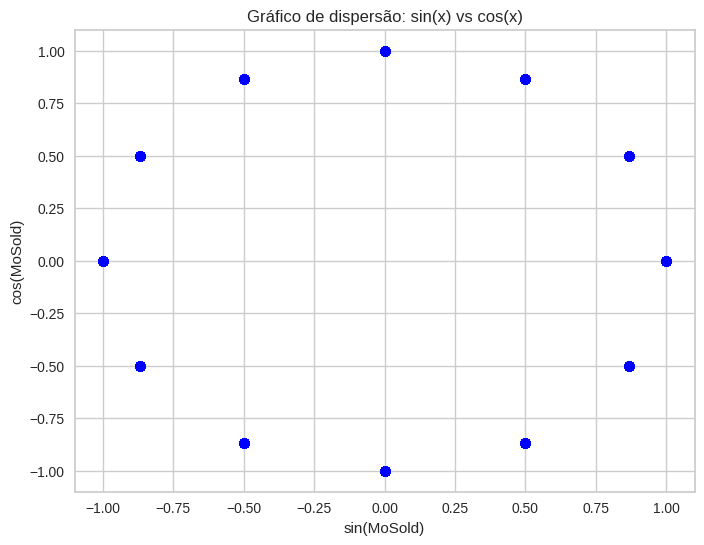

In [12]:
def plotando_grafico_do_sin_x_cos(x, y):

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', alpha=0.5)
    plt.title('Gráfico de dispersão: sin(x) vs cos(x)')
    plt.xlabel('sin(MoSold)')
    plt.ylabel('cos(MoSold)')
    plt.grid(True)
    plt.show()

plotando_grafico_do_sin_x_cos(dataset_processing["MoSold_sin"], dataset_processing["MoSold_cos"])

## Feature Transformation

Alguns modelos performam melhor quando a distribuição dos dados se assemelha a uma distribuição normal. Então o que tetaremos fazer aqui é transformar a distribuição dos dados em distribuição normal.

[procurar mais sobre]

O que faremos primeiramente é procurar as as distribuições assimétricas, ou "skewness", que se referem a falta de simetria de uma distribuição de dados em torno de sua média. 

Quanto mais perto de zero o fator "skewness" for, mais esta distribuição será simétrica.


<div style="text-align:center">

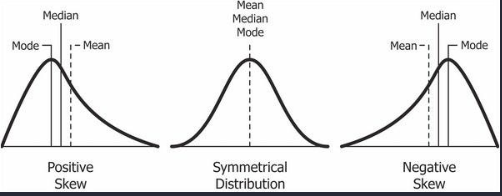

</div>


In [13]:
def separando_em_numericos_e_categoricos(dataframe):

    columns_type = pd.DataFrame({'Column': dataframe.columns, 'Type': dataframe.dtypes}).reset_index(drop=True)

    objects_columns = columns_type[columns_type["Type"] == "object"]["Column"].values
    numerics_columns = columns_type[columns_type["Type"] != "object"]["Column"].values

    return objects_columns, numerics_columns

objects_columns, numerics_columns = separando_em_numericos_e_categoricos(dataset_processing)

display(dataset_processing[objects_columns].head())
display(dataset_processing[numerics_columns].head())

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MoSold_sin,MoSold_cos
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,61,0,0,0,0,0,2008,8.660254e-01,5.000000e-01
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,298,0,0,0,0,0,0,2007,5.000000e-01,-8.660254e-01
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,42,0,0,0,0,0,2008,-1.000000e+00,-1.836970e-16
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,35,272,0,0,0,0,2006,8.660254e-01,5.000000e-01
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,192,84,0,0,0,0,0,2008,-2.449294e-16,1.000000e+00


In [14]:
def skewness_metrics(dataframe, colunas):
    skew_df = pd.DataFrame(dataframe[colunas].columns, columns=["Columns"])
    skew_df["skew"] = skew_df["Columns"].apply(lambda column: abs(skew(dataframe[column])))
    filter_skew = skew_df.query("skew > 0.5").sort_values(by="skew", ascending=False, ignore_index=True)
    filter_skew = filter_skew[~filter_skew["Columns"].isin(["MoSold_cos", "MoSold_sin"])]
    
    return filter_skew

filter_skew_train = skewness_metrics(dataset_processing, numerics_columns)
filter_skew_train

,Columns,skew
0,MiscVal,21.947195
1,PoolArea,16.898328
2,LotArea,12.822431
3,LowQualFinSF,12.088761
4,3SsnPorch,11.376065
5,KitchenAbvGr,4.302254
6,BsmtFinSF2,4.146143
7,EnclosedPorch,4.003891
8,ScreenPorch,3.946694
9,BsmtHalfBath,3.931594


In [15]:
def plot_mult_graphs(dataframe, column, linhas, colunas):

    num_linhas = linhas
    fig, axs = plt.subplots(num_linhas, colunas, figsize=(20, 9))
    axs = axs.ravel()

    # Plotando histogramas para cada coluna
    for i, coluna in enumerate(dataframe[column]):
        sns.histplot(train[coluna], kde=True, ax=axs[i], color='skyblue')
        axs[i].set_title(f'Distribuição de {coluna}')
        axs[i].set_xlabel('Valores')
        axs[i].set_ylabel('Frequência')

    # Ajustando layout
    plt.tight_layout()
    plt.show()

plot_mult_graphs(filter_skew_train, "Columns", 4, 7)

KeyboardInterrupt: 

In [ ]:
dataset_processing[numerics_columns].describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MoSold_sin,MoSold_cos
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2.919000e+03,2.919000e+03
mean,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.272011,49.565262,560.579993,1051.417266,1159.581706,336.483727,4.694416,1500.759849,0.429599,0.061322,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1979.577938,1.766701,472.712573,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,2007.792737,1.479827e-02,-3.428676e-01
std,21.312345,7886.996359,1.409947,1.113131,30.291442,20.894344,178.626089,455.606014,169.179104,439.590889,441.120498,392.362079,428.701456,46.396825,506.051045,0.524676,0.245608,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.605659,0.761506,215.535686,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,1.314964,6.620168e-01,6.665275e-01
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,-1.000000e+00,-1.000000e+00
25%,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.500000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,-5.000000e-01,-8.660254e-01
50%,69.305795,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,467.000000,989.000000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,1.224647e-16,-5.000000e-01
75%,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,805.000000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,5.000000e-01,6.123234e-17
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,2010.000000,1.000000e+00,1.000000e+00


In [ ]:
for column in filter_skew_train["Columns"].to_list():
    dataset_processing[column] = np.log1p(dataset_processing[column])

filter_skew_train = skewness_metrics(dataset_processing, numerics_columns)
filter_skew_train

,Columns,skew
0,PoolArea,14.998335
1,3SsnPorch,8.825256
2,LowQualFinSF,8.557690
3,MiscVal,5.213984
4,TotalBsmtSF,4.956294
5,BsmtHalfBath,3.774762
6,KitchenAbvGr,3.520351
7,ScreenPorch,2.945905
8,BsmtFinSF2,2.462483
9,BsmtUnfSF,2.155206


Iremos utilizar a função de logaritmo para transformas as distribuições assimétricas em distribuições mais próximas da normal.

Mas analisando os dados podemos reparaar que temos muitos números minimos de 0, e sabemos que log de 0 é indefinido. Para isso então, usaremos a função do numpy de log + 1, que soma + 1 para que possamos ultrapassar essa barreira

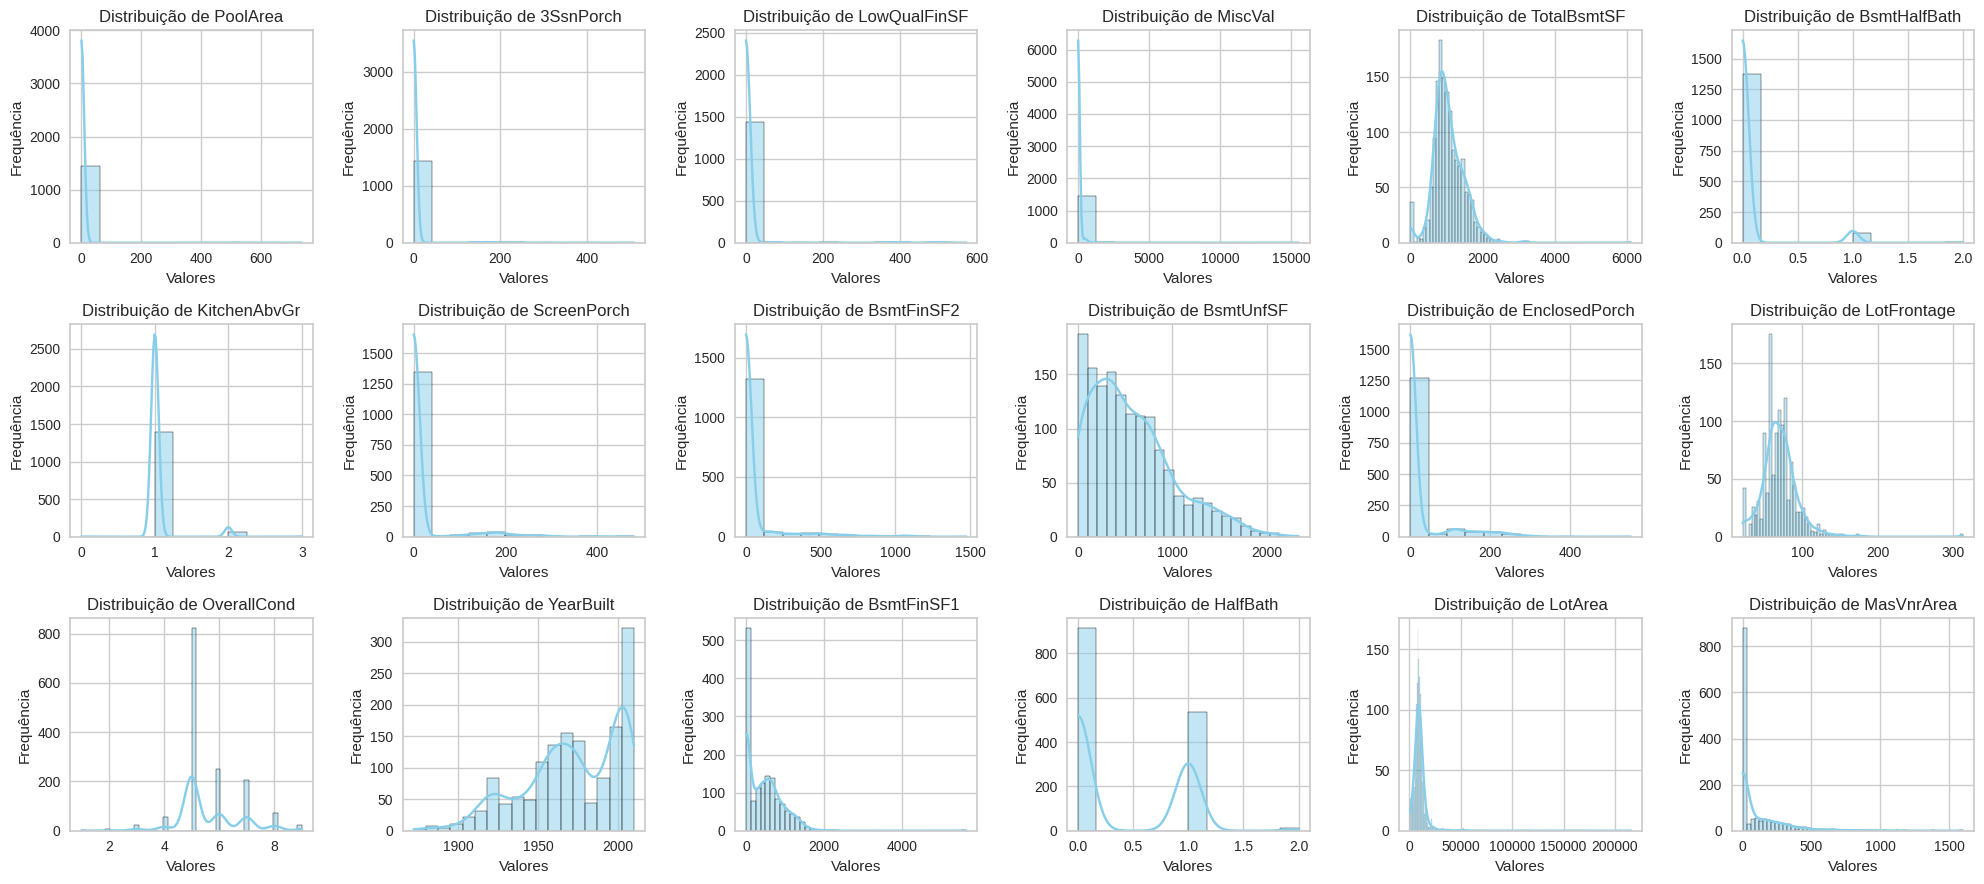

In [ ]:
plot_mult_graphs(filter_skew_train, "Columns", 3, 6)

In [ ]:
dataset_processing = pd.get_dummies(dataset_processing)
dataset_processing

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MoSold_sin,MoSold_cos,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_

In [ ]:
columns_processing = dataset_processing.columns
index_processing = dataset_processing.index

scaler = StandardScaler().fit(dataset_processing)
dataset_processing_numpy = scaler.transform(dataset_processing)
dataset_processing_numpy

array([[-0.04971652, -0.10371897,  0.6461834 , ..., -0.12653513,
         0.46393674, -0.30269297],
       [ 0.5883598 ,  0.14654351, -0.06318454, ..., -0.12653513,
         0.46393674, -0.30269297],
       [ 0.08878149,  0.45762904,  0.6461834 , ..., -0.12653513,
         0.46393674, -0.30269297],
       ...,
       [ 2.72870067,  1.5861721 , -0.77255247, ..., -0.12653513,
        -2.15546626, -0.30269297],
       [-0.19465856,  0.31125467, -0.77255247, ..., -0.12653513,
         0.46393674, -0.30269297],
       [ 0.3485729 ,  0.15205212,  0.6461834 , ..., -0.12653513,
         0.46393674, -0.30269297]])

In [ ]:
dataset_clean = pd.DataFrame(dataset_processing_numpy, index=index_processing, columns=columns_processing)
dataset_clean

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MoSold_sin,MoSold_cos,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_

## Target Column

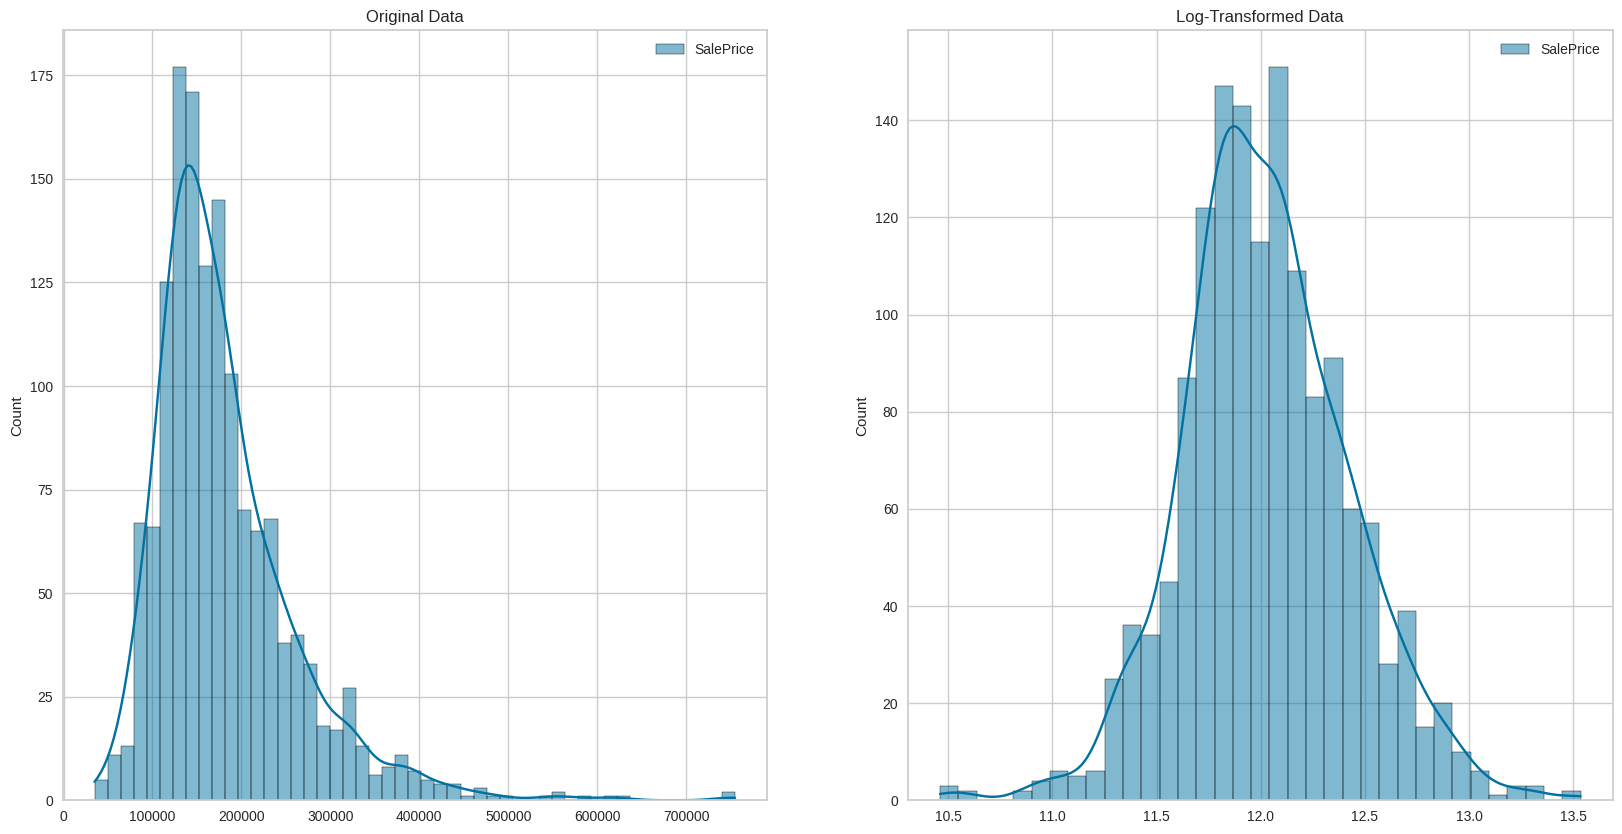

In [ ]:
log_target = np.log(target)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(target, kde=True, ax=axes[0])
axes[0].set_title('Original Data')

sns.histplot(log_target, kde=True, ax=axes[1])
axes[1].set_title('Log-Transformed Data')

plt.show()

#Podemos ver que a distribuição da nossa coluna SalesPrice não obedece uma distribuição normal. Então quando aplicamos a função logaritmo ela se redistribui para uma normal

In [ ]:
train = dataset_clean.loc[dataset_clean.index.isin(train_id)]
test = dataset_clean.loc[dataset_clean.index.isin(test_id)]

display(train.head())
display(test.head())

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MoSold_sin,MoSold_cos,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MoSold_sin,MoSold_cos,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_

In [ ]:
train = pd.concat([train, log_target], axis=1)
train

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MoSold_sin,MoSold_cos,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_

In [ ]:
_ = setup(data=train, target="SalePrice")

,Description,Value
0,Session id,1974
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 283)"
4,Transformed data shape,"(1460, 283)"
5,Transformed train set shape,"(1021, 283)"
6,Transformed test set shape,"(439, 283)"
7,Numeric features,282
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare_models()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MoSold_sin,MoSold_cos,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_

In [ ]:
baseline_model = CatBoostRegressor(verbose=0)
baseline_model.fit(train.drop(columns=["SalePrice"]), log_target)

In [ ]:
kf = KFold(n_splits=10)
results = cross_val_score(baseline_model, train, log_target, scoring="neg_mean_squared_error", cv=kf)

In [ ]:
predictions = np.exp(baseline_model.predict(test))
predictions


array([125374.58502185, 156934.35061834, 183280.87265593, ...,
       161649.52866871, 120021.30567087, 220182.96677537])

In [ ]:
submission = pd.concat([test_id, pd.Series(predictions, name="SalePrice")], axis=1)
submission.to_csv("prediction_HouseSales_v004.csv", index=False)